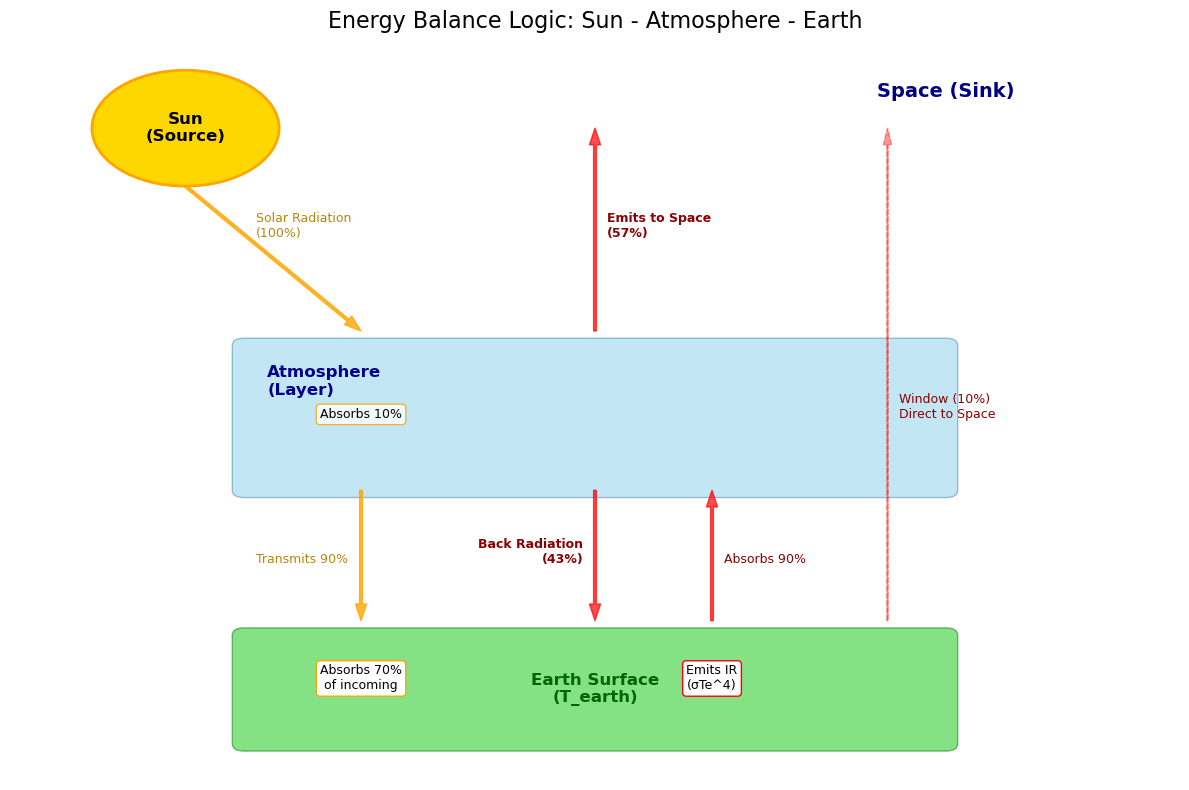

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_energy_balance():
    # 创建画布
    fig, ax = plt.figure(figsize=(12, 8)), plt.gca()
    
    # 隐藏坐标轴
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')

    # ==================== 绘制区域 (Nodes) ====================
    # 1. 太阳 (左上角)
    sun = patches.Circle((1.5, 9), 0.8, color='gold', ec='orange', lw=2)
    ax.add_patch(sun)
    ax.text(1.5, 9, "Sun\n(Source)", ha='center', va='center', fontweight='bold', fontsize=12)

    # 2. 太空 (顶部背景概念，不画框，只作为箭头的终点)
    ax.text(8, 9.5, "Space (Sink)", ha='center', va='center', fontsize=14, fontweight='bold', color='navy')

    # 3. 大气层 (中间层)
    # 绘制一个横跨的矩形
    atmosphere = patches.FancyBboxPatch((2, 4), 6, 2, boxstyle="round,pad=0.1", fc='skyblue', ec='steelblue', alpha=0.5)
    ax.add_patch(atmosphere)
    ax.text(2.2, 5.5, "Atmosphere\n(Layer)", ha='left', va='center', fontsize=12, fontweight='bold', color='darkblue')

    # 4. 地球 (底部层)
    earth = patches.FancyBboxPatch((2, 0.5), 6, 1.5, boxstyle="round,pad=0.1", fc='limegreen', ec='forestgreen', alpha=0.6)
    ax.add_patch(earth)
    ax.text(5, 1.25, "Earth Surface\n(T_earth)", ha='center', va='center', fontsize=12, fontweight='bold', color='darkgreen')

    # ==================== 绘制能量流 (Arrows) ====================
    
    # 箭头样式配置
    arrow_props_solar = dict(facecolor='orange', edgecolor='orange', width=2, headwidth=8, alpha=0.8)
    arrow_props_ir = dict(facecolor='red', edgecolor='red', width=2, headwidth=8, alpha=0.7)
    
    # --- A. 太阳辐射 (短波) ---
    # A1. 太阳 -> 大气
    ax.annotate("", xy=(3, 6.2), xytext=(1.5, 8.2), arrowprops=arrow_props_solar)
    ax.text(2.1, 7.5, "Solar Radiation\n(100%)", fontsize=9, color='darkgoldenrod')

    # A2. 大气吸收 (10%)
    ax.text(3, 5, "Absorbs 10%", ha='center', fontsize=9, bbox=dict(boxstyle="round", fc="white", ec="orange", alpha=0.8))
    
    # A3. 大气 -> 地球 (透过 90%)
    ax.annotate("", xy=(3, 2.2), xytext=(3, 4), arrowprops=arrow_props_solar)
    ax.text(2.1, 3, "Transmits 90%", fontsize=9, color='darkgoldenrod', ha='left')

    # A4. 地球吸收 (90% * 70%)
    ax.text(3, 1.25, "Absorbs 70%\nof incoming", ha='center', fontsize=9, bbox=dict(boxstyle="round", fc="white", ec="orange"))

    # --- B. 地球长波辐射 (长波) ---
    # B1. 地球发射 (总量)
    ax.text(6, 1.25, "Emits IR\n(σTe^4)", ha='center', fontsize=9, bbox=dict(boxstyle="round", fc="white", ec="red"))
    
    # B2. 地球 -> 大气 (被吸收 90%)
    ax.annotate("", xy=(6, 4), xytext=(6, 2.2), arrowprops=arrow_props_ir)
    ax.text(6.1, 3, "Absorbs 90%", fontsize=9, color='darkred', ha='left')

    # B3. 地球 -> 太空 (大气窗口 10%) - 绕过大气层
    # 为了视觉效果，我们画一条穿过大气的虚线或者旁路，这里画一条穿透的直箭
    ax.annotate("", xy=(7.5, 9), xytext=(7.5, 2.2), arrowprops=dict(facecolor='red', edgecolor='red', width=1, headwidth=6, alpha=0.4, linestyle='--'))
    ax.text(7.6, 5, "Window (10%)\nDirect to Space", fontsize=9, color='darkred', ha='left')

    # --- C. 大气长波发射 (温室效应) ---
    # C1. 大气 -> 太空 (57%)
    ax.annotate("", xy=(5, 9), xytext=(5, 6.2), arrowprops=arrow_props_ir)
    ax.text(5.1, 7.5, "Emits to Space\n(57%)", fontsize=9, color='darkred',fontweight='bold')

    # C2. 大气 -> 地球 (逆辐射 43%)
    ax.annotate("", xy=(5, 2.2), xytext=(5, 4), arrowprops=arrow_props_ir)
    ax.text(4.9, 3, "Back Radiation\n(43%)", fontsize=9, color='darkred', ha='right', fontweight='bold')

    # 标题
    plt.title("Energy Balance Logic: Sun - Atmosphere - Earth", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_energy_balance()